# Исследование объявлений о продаже квартир

Изучим данные, предоставленные сервисом для проекта.

## Изучение данных из файла

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Открыли файл с данными с учётом разделителя '\t' и вывели на экран первые пять строк. Сразу видны пропуски в значениях NaN, а также стилистическое нарушение в именовании столбца cityCenters_nearest. Посмотрим на файл с помощью метода .info()

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

<html>
    <body>
        <p>Изучив информацию о датафрейме можно сказать следующее: количество столбцов 22.</p>
        <p>Согласно описания данных:</p>
&#9679; airports_nearest — расстояние до ближайшего аэропорта в метрах (м),<br>
&#9679; balcony — число балконов,<br>
&#9679; ceiling_height — высота потолков (м),<br>
&#9679; cityCenters_nearest — расстояние до центра города (м),<br>
&#9679; days_exposition — сколько дней было размещено объявление (от публикации до снятия),<br>
&#9679; first_day_exposition — дата публикации,<br>
&#9679; floor — этаж,<br>
&#9679; floors_total — всего этажей в доме,<br>
&#9679; is_apartment — апартаменты (булев тип),<br>
&#9679; kitchen_area — площадь кухни в квадратных метрах (м²),<br>
&#9679; last_price — цена на момент снятия с публикации,<br>
&#9679; living_area — жилая площадь в квадратных метрах (м²),<br>
&#9679; locality_name — название населённого пункта,<br>
&#9679; open_plan — свободная планировка (булев тип),<br>
&#9679; parks_around3000 — число парков в радиусе 3 км,<br>
&#9679; parks_nearest — расстояние до ближайшего парка (м),<br>
&#9679; ponds_around3000 — число водоёмов в радиусе 3 км,<br>
&#9679; ponds_nearest — расстояние до ближайшего водоёма (м),<br>
&#9679; rooms — число комнат,<br>
&#9679; studio — квартира-студия (булев тип),<br>
&#9679; total_area — площадь квартиры в квадратных метрах (м²),<br>
&#9679; total_images — число фотографий квартиры в объявлении.<br>
        <p>Количество значений различается, что говорит о наличии пропусков. В описании данных проекта показано три столбца с булевым типом, а по информации столбец is_apartment имеет тип object. Также имеется стилистическое нарушение в названии столбца cityCenters_nearest. Также есть столбец с цифрами в названии, но они стоят вконце. Соответственно такое название не нарушает ни синтаксиса, ни стиля. В датафрейме есть столбец с датой публикации, однако его отображение не удобочитаемо.</p>
        <p>Также необходимо изменить тип данных у столбцов: floors_total, days_exposition, last_price - этажей в доме не может быть дробно, размещение объявления считается также в целых дня, а цену лучше читать в целочисленном формате (погрешность не повлияет на исследование).
        </p>
    </body>
    </html>

### Вывод

Таким образом, необходимо провести предобработку данных: исправить стилистические нарушения, привести определённые данные к нужному типу, изменить отображение даты публикации. Однако, для дальнейшего анализа данных не все столбцы нужны, поэтому разумно удалить часть столбуов: total_images, balcony,  is_apartment, open_plan, studio совершенно не повлияют на анализ данных, покольку задача касается только ценообразования квартир, площадей квартир, этажности, комнат, локализации, удалённости квартиры от центра, даты и продолжительности публикации.

## Предобработка данных

In [123]:
df = df.drop(columns=['total_images', 'balcony', 'is_apartment', 'open_plan', 'studio', 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'], axis=1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 12 columns):
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
kitchen_area            21421 non-null float64
locality_name           23650 non-null object
cityCenters_nearest     18180 non-null float64
days_exposition         20518 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 2.2+ MB


In [124]:
df.columns #посмотрим на названия столбцов

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'locality_name', 'cityCenters_nearest',
       'days_exposition'],
      dtype='object')

Изменим наименование столбца cityCenters_nearest на правильное.

In [125]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
df.columns #ещё раз посмотрим на названия столбцов

Index(['last_price', 'total_area', 'first_day_exposition', 'rooms',
       'ceiling_height', 'floors_total', 'living_area', 'floor',
       'kitchen_area', 'locality_name', 'city_centers_nearest',
       'days_exposition'],
      dtype='object')

Как видим переименование столбцов прошло успешно. Приведём дату в соответствующий формат.

In [126]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
0,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,25.0,Санкт-Петербург,16028.0,NaN
1,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,11.0,посёлок Шушары,18603.0,81.0
2,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,8.3,Санкт-Петербург,13933.0,558.0
3,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,Санкт-Петербург,6800.0,424.0
4,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,Санкт-Петербург,8098.0,121.0


In [127]:
df.describe() #посмотрим на значения столбцов датафрейма

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,city_centers_nearest,days_exposition
count,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,18180.000000,20518.000000
mean,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,14191.277833,180.888634
std,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,8608.386210,219.727988
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,181.000000,1.000000
25%,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,9238.000000,45.000000
50%,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,13098.500000,95.000000
75%,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,16293.000000,232.000000
max,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,65968.000000,1580.000000


Стандартное отклонение в столбцах last_price, total_area, living_area, kitchen_area, rooms, ceiling_height отличается от среднего, что говорит о возможных выбросах. Посмотрим на каждый столбец подробнее построив гистограммы и диаграммы размаха.

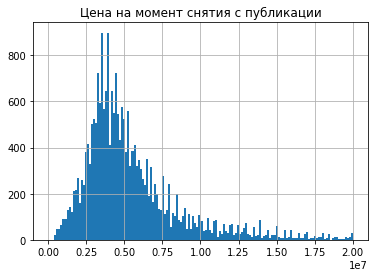

In [128]:
df['last_price'].hist(bins=150, range=(0, 2*10e+6))
plt.title("Цена на момент снятия с публикации") 
plt.show()

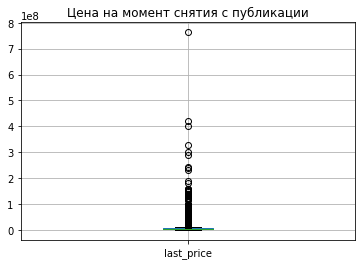

In [129]:
df.boxplot(['last_price'])
plt.title("Цена на момент снятия с публикации") 
plt.show()

По диаграмме размаха виден выброс. Посмотрим на значения столбца, отсортировав по убыванию.

In [130]:
df.sort_values(by=['last_price'], ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
12971,763000000.0,400.0,2017-09-30,7,NaN,10.0,250.0,10,NaN,Санкт-Петербург,3956.0,33.0
19540,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,112.0,Санкт-Петербург,7877.0,106.0
14706,401300000.0,401.0,2016-02-20,5,NaN,9.0,204.0,9,24.0,Санкт-Петербург,2389.0,393.0
1436,330000000.0,190.0,2018-04-04,3,3.5,7.0,95.0,5,40.0,Санкт-Петербург,1197.0,233.0
15651,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,70.0,Санкт-Петербург,5297.0,111.0


В столбце last_price выбросом можно считать значение 763000000, поскольку значения ниже 400000000 идут последовательно.

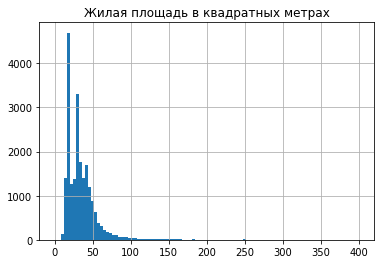

In [131]:
df['living_area'].hist(bins=100, range=(0, 400))
plt.title("Жилая площадь в квадратных метрах") 
plt.show()

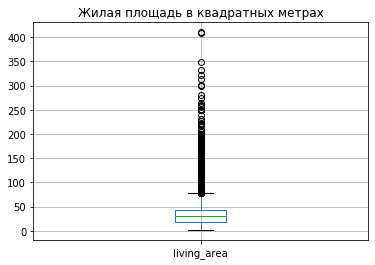

In [132]:
df.boxplot(['living_area'])
plt.title("Жилая площадь в квадратных метрах") 
plt.show()

In [133]:
df.sort_values(by=['living_area'], ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
19540,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,112.0,Санкт-Петербург,7877.0,106.0
5358,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,100.0,Санкт-Петербург,4666.0,14.0
12401,91500000.0,495.0,2017-06-19,7,4.65,7.0,347.5,7,25.0,Санкт-Петербург,5735.0,14.0
4237,50000000.0,517.0,2017-10-14,7,NaN,4.0,332.0,3,22.0,Санкт-Петербург,1847.0,NaN
12859,140000000.0,631.2,2019-04-09,7,3.90,4.0,322.3,4,19.5,Санкт-Петербург,4972.0,NaN


В столбце living_area значения 409,7 и 409 стоят достаточно обособленно, отдельной точн=кой на диаграмме размахе. Думаю их тоже можно признать выбросами.

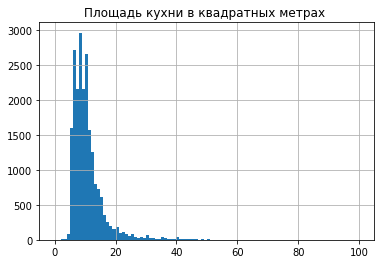

In [134]:
df['kitchen_area'].hist(bins=100, range=(0, 100))
plt.title("Площадь кухни в квадратных метрах ") 
plt.show()

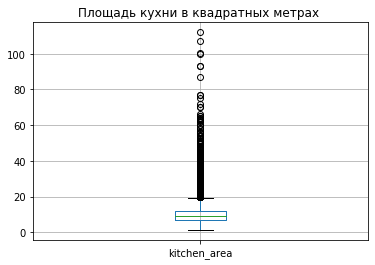

In [135]:
df.boxplot(['kitchen_area'])
plt.title("Площадь кухни в квадратных метрах ") 
plt.show()

In [21]:
df.sort_values(by=['kitchen_area'], ascending=False).head()

В столбце kitchen_area особо нет выбросов, более менее значения идут последовательно. Точки на диаграмме размаха отражаются равномерно рядышком.

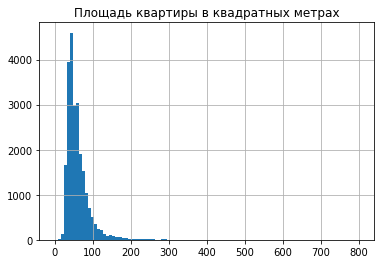

In [136]:
df['total_area'].hist(bins=100, range=(0, 800))
plt.title("Площадь квартиры в квадратных метрах") 
plt.show()

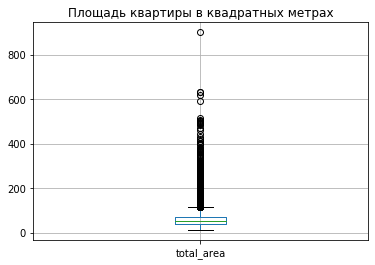

In [137]:
df.boxplot(['total_area'])
plt.title("Площадь квартиры в квадратных метрах") 
plt.show()

In [138]:
df.sort_values(by=['total_area'], ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
19540,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,112.0,Санкт-Петербург,7877.0,106.0
12859,140000000.0,631.2,2019-04-09,7,3.9,4.0,322.3,4,19.5,Санкт-Петербург,4972.0,NaN
3117,140000000.0,631.0,2019-03-30,7,NaN,5.0,NaN,5,60.0,Санкт-Петербург,4972.0,NaN
15651,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,70.0,Санкт-Петербург,5297.0,111.0
5358,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,100.0,Санкт-Петербург,4666.0,14.0


А вот в столбце total_area явно есть выброс, отдельная точка на диаграмме размаха со значением 900.

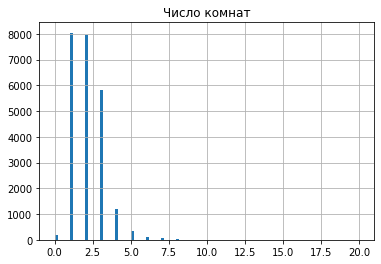

In [139]:
df['rooms'].hist(bins=100, range=(0, 20))
plt.title("Число комнат") 
plt.show()

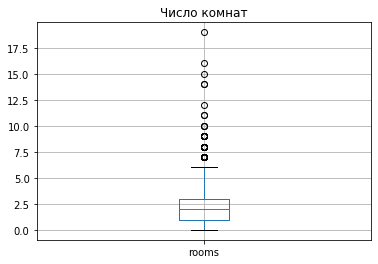

In [140]:
df.boxplot(['rooms'])
plt.title("Число комнат") 
plt.show()

In [141]:
df.sort_values(by=['rooms'], ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
14498,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,27.6,Санкт-Петербург,3574.0,114.0
18848,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,13.0,Санкт-Петербург,4142.0,1365.0
5358,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,100.0,Санкт-Петербург,4666.0,14.0
20829,28659000.0,245.4,2016-03-31,14,NaN,4.0,168.3,2,25.9,Санкт-Петербург,2054.0,95.0
866,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,16.6,Санкт-Петербург,7950.0,418.0


Здесь тоже есть небольшой выброс со значением 19.

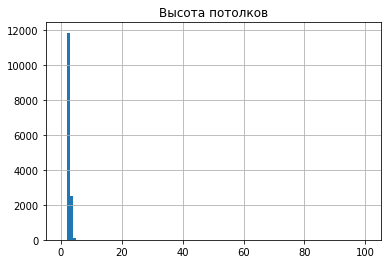

In [142]:
df['ceiling_height'].hist(bins=100, range=(0, 100))
plt.title("Высота потолков") 
plt.show()

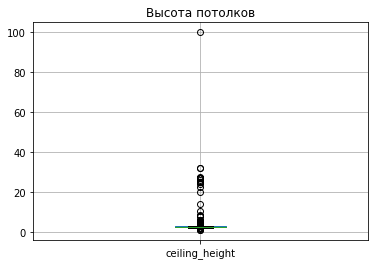

In [143]:
df.boxplot(['ceiling_height'])
plt.title("Высота потолков") 
plt.show()

In [144]:
df.sort_values(by=['ceiling_height'], ascending=False).head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition
22869,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,11.0,Санкт-Петербург,8283.0,19.0
22336,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,16.5,Санкт-Петербург,3506.0,NaN
3148,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,8.0,Волхов,NaN,NaN
21377,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,11.0,Санкт-Петербург,9760.0,61.0
20478,8000000.0,45.0,2017-07-18,1,27.0,4.0,22.0,2,10.0,Санкт-Петербург,3246.0,429.0


Тут видно, что значение 100 показывается на графике отдельной точкой, выбросом.

<html>
    <body>
        <p>Итак, необходимо подвести итоги по вышепоказанным графикам: чёткие выбросы есть в столбцах ceiling_height, total_area, living_area, last_price.</p>
        <p>Высота потолков в 100 метров с общей площадью в 25 кв.метров, очень подозрительна. Возможно какая-то техническая ошибка при внесении данных, поэтому и учитывать такие данные нельзя.<br> 
           Цена квартиры в 763 миллиона тоже очень настораживает, да и потом мало заполнено значяений, вполне возможна ошибка в данных.<br>
           По общей площади тоже непонятно, 900 кв.метров на одном этаже и с кухней в 112 кв.метров. Больше похоже на гостиницу возможно. Такие данные не интересуют. 
           <br>А в жилой площади есть два выброса с близкими значениями в 409 и 409,7 кв.метров, также на одном этаже. Также можно взять в выброс.</p>
        <p>Остальные столбцы не показывают сильных выбросов, поэтому и резать данные по ним, не стоит. 
            А вот убрать из датасета данные с резкими выбросами можно.</p>
    </body>
    </html>

In [145]:
#Сформируем новый датафрейм с отсечёнными выросами.
df = df[(df['last_price'] < 763000000.0)&(df['ceiling_height'] < 100.0)&(df['living_area'] < 400.0)]
df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,city_centers_nearest,days_exposition
count,1.370400e+04,13704.000000,13704.000000,13704.000000,13698.000000,13704.000000,13704.000000,13333.000000,10973.000000,11353.000000
mean,6.751502e+06,61.545517,2.135362,2.766107,10.197839,35.626687,5.637040,10.511664,14105.598925,192.510174
std,9.436799e+06,34.997247,1.089510,0.993609,6.201714,22.403996,4.617174,5.900550,8787.281443,229.089818
min,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,181.000000,1.000000
25%,3.599750e+06,41.000000,1.000000,2.520000,5.000000,19.200000,2.000000,7.000000,9148.000000,45.000000
50%,4.850000e+06,53.400000,2.000000,2.650000,9.000000,30.800000,4.000000,9.000000,12990.000000,106.000000
75%,7.000000e+06,71.340000,3.000000,2.800000,14.000000,43.300000,7.000000,12.000000,16032.000000,251.000000
max,3.300000e+08,631.200000,16.000000,32.000000,60.000000,347.500000,30.000000,93.200000,65968.000000,1580.000000


Теперь посмотрим на пропуски в значениях.

In [146]:
df.isna().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               6
living_area                0
floor                      0
kitchen_area             371
locality_name             14
city_centers_nearest    2731
days_exposition         2351
dtype: int64

<html>
    <body>
    <p>Видим много пропусков в столбцах: всего этажей в доме, площадь кухни в квадратных метрах, название населённого пункта, расстояние до центра города, сколько дней было размещено объявление (от публикации до снятия).</p>
     <p>Стоит определить как будем заменять пропуски, для этого посмотрм корреляцию.
    </body>
    </html>

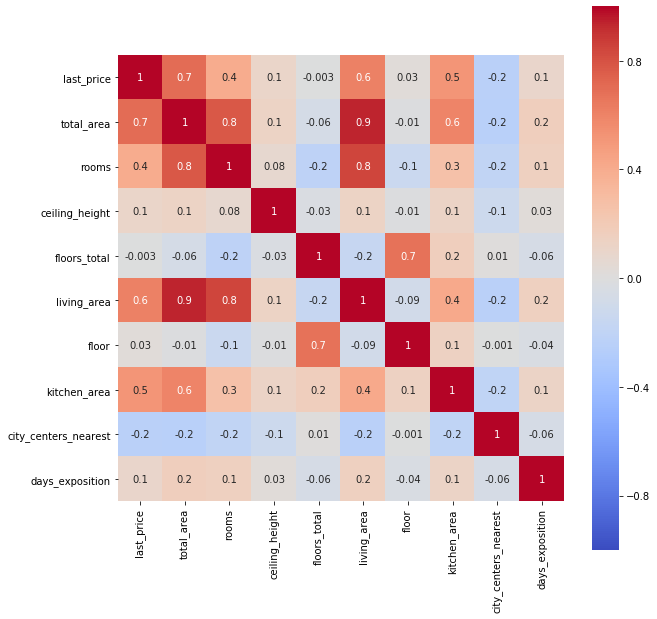

In [147]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

Как видим корреляция слабая. Заменим все значения на ноль, а locality_name оставим пустыми.

In [148]:
df['locality_name'] = df['locality_name'].fillna('')

columns = ['days_exposition', 'floors_total', 'kitchen_area', 'city_centers_nearest']

for i in columns:
    df[i] = df[i].fillna(0)
    
df.isna().sum()

last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
kitchen_area            0
locality_name           0
city_centers_nearest    0
days_exposition         0
dtype: int64

Прежде чем переходить к следующему шагу, стоит заменить тип данных, для удобства работы. Еще раз посмотрим на них.

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13704 entries, 0 to 23698
Data columns (total 12 columns):
last_price              13704 non-null float64
total_area              13704 non-null float64
first_day_exposition    13704 non-null datetime64[ns]
rooms                   13704 non-null int64
ceiling_height          13704 non-null float64
floors_total            13704 non-null float64
living_area             13704 non-null float64
floor                   13704 non-null int64
kitchen_area            13704 non-null float64
locality_name           13704 non-null object
city_centers_nearest    13704 non-null float64
days_exposition         13704 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(2), object(1)
memory usage: 1.4+ MB


In [150]:
#заменим тип данных в соответствующих столбцах
columns = ['floors_total', 'days_exposition', 'last_price', 'city_centers_nearest']

for i in columns:
    df[i] = df[i].astype('int')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13704 entries, 0 to 23698
Data columns (total 12 columns):
last_price              13704 non-null int64
total_area              13704 non-null float64
first_day_exposition    13704 non-null datetime64[ns]
rooms                   13704 non-null int64
ceiling_height          13704 non-null float64
floors_total            13704 non-null int64
living_area             13704 non-null float64
floor                   13704 non-null int64
kitchen_area            13704 non-null float64
locality_name           13704 non-null object
city_centers_nearest    13704 non-null int64
days_exposition         13704 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 1.4+ MB


Заменили тип данных в этих столбцах на целочисленный, поскольку этажей и дней публикации явно не может быть дробным числом, а цену и расстояние удобнее воспринимать также целым числом.

## Расчёты и добавление результатов в таблицу

<html>
    <body>
        Для проведения дальнейшего исследования и выполнения поставленных задач необходимо добавить в таблицу следующие столбцы:<br>
&#8729; цена квадратного метра;<br>
&#8729; день недели, месяц и год публикации объявления;<br>
&#8729; этаж квартиры: варианты — первый, последний, другой;<br>
&#8729; соотношение жилой и общей площади, а также отношение площади кухни к общей.<br>
    </body>
    </html>

In [151]:
df['metr_price'] = (df['last_price'] / df['total_area']).astype('int') #добавим  цену квадратного метра
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,metr_price
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028,0,120370
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098,121,100000
9,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008,289,88524
10,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878,137,127525
13,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,5.2,Петергоф,33058,366,82943


In [152]:
#добавим день недели, месяц и год публикации объявления
df['date'] = df['first_day_exposition'].dt.day # Получаем день
df['month'] = df['first_day_exposition'].dt.month # Получаем месяц
df['year'] = df['first_day_exposition'].dt.year # Получаем год
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,metr_price,date,month,year
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028,0,120370,7,3,2019
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098,121,100000,19,6,2018
9,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008,289,88524,26,2,2017
10,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878,137,127525,16,11,2017
13,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,5.2,Петергоф,33058,366,82943,1,7,2017


In [153]:
#добавим этаж квартиры: варианты — первый, последний, другой
def apartment_floor(df):
    if df['floor'] == 1:
        return 'первый'
    if (df['floor'] == df['floors_total'])&(df['floors_total'] != 1):
        return 'последний'
    return 'другой'
 
df['apartment_floor'] = df.apply(apartment_floor, axis=1)

df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,metr_price,date,month,year,apartment_floor
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028,0,120370,7,3,2019,другой
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098,121,100000,19,6,2018,другой
9,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008,289,88524,26,2,2017,другой
10,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878,137,127525,16,11,2017,другой
13,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,5.2,Петергоф,33058,366,82943,1,7,2017,последний


In [154]:
#добавим соотношение жилой и общей площади, а также отношение площади кухни к общей, выразим в процентах.
fmt='{:.0%}'.format
df['liv_tot_per'] = (df['living_area'] / df['total_area']).map(fmt)
df['kit_tot_per'] = (df['kitchen_area'] / df['total_area']).map(fmt)
df.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,city_centers_nearest,days_exposition,metr_price,date,month,year,apartment_floor,liv_tot_per,kit_tot_per
0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,25.0,Санкт-Петербург,16028,0,120370,7,3,2019,другой,47%,23%
4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,8098,121,100000,19,6,2018,другой,32%,41%
9,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,6.5,Санкт-Петербург,15008,289,88524,26,2,2017,другой,71%,11%
10,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,8.5,Санкт-Петербург,13878,137,127525,16,11,2017,другой,51%,21%
13,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,5.2,Петергоф,33058,366,82943,1,7,2017,последний,63%,12%


## Исследовательский анализ данных

Изучим время продажи квартиры, построив гистограмму.

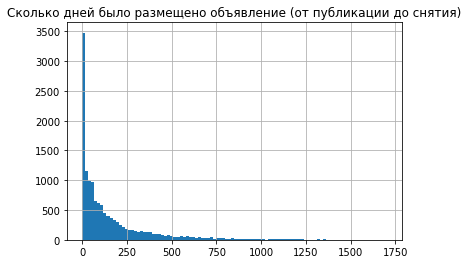

In [155]:
df['days_exposition'].hist(bins=100, range=(0, 1700))
plt.title("Сколько дней было размещено объявление (от публикации до снятия)") 
plt.show()

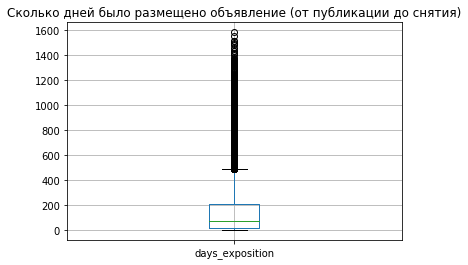

In [156]:
df.boxplot(['days_exposition']) #для наглядности посмотрим на диаграмму размаха
plt.title("Сколько дней было размещено объявление (от публикации до снятия)") 
plt.show()

In [157]:
df['days_exposition'].describe() #выведем статистические значения

count    13704.000000
mean       159.483946
std        220.783631
min          0.000000
25%         16.000000
50%         74.000000
75%        205.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по гистограмме, имеетя длинный хвост до значения 3500 дней. Такие данные очень подозрительны, продажи шли очень долго, более восьми лет.  На диаграмме размаха выбросы начинаются уже с 400 дней, что вполне логично, более года. Но есть и нулевые значения, это уж слишком быстрые продажи. Медиана расположена на 74 днях, это чуть более 2 месяцев, а среднее арифметическое - 159, это почти полгода.

Определим какие факторы больше всего влияют на стоимость квартиры: зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения (дня недели, месяца и года).

In [158]:
#подготовим столбец с этажами 
df['apartment_floor'] = df['apartment_floor'].replace('первый', 1)
df['apartment_floor'] = df['apartment_floor'].replace('последний', 2)
df['apartment_floor'] = df['apartment_floor'].replace('другой', 0)

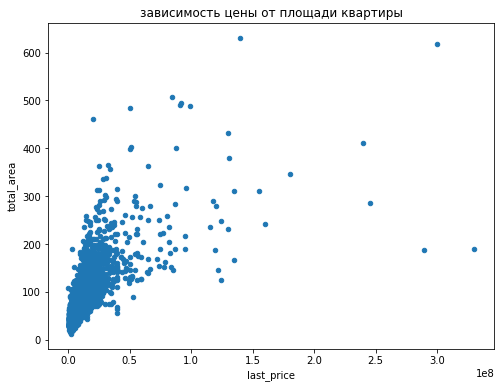

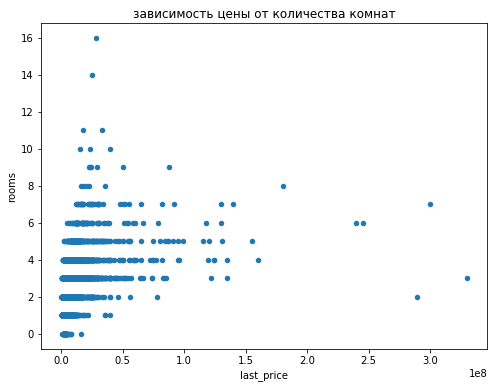

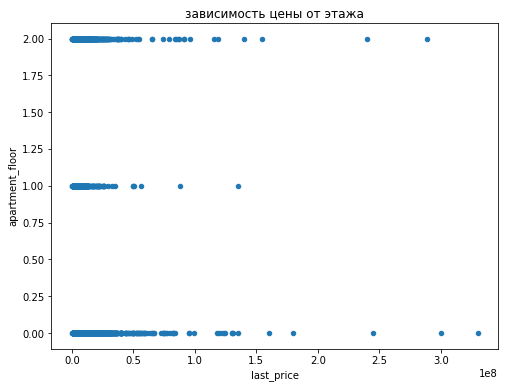

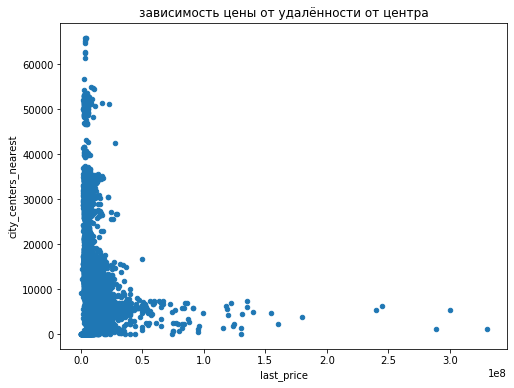

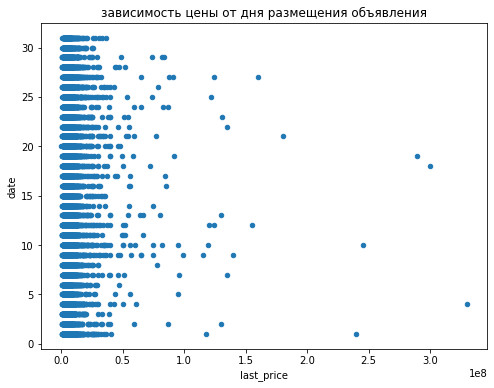

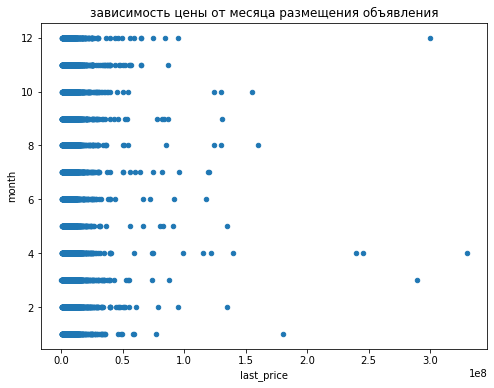

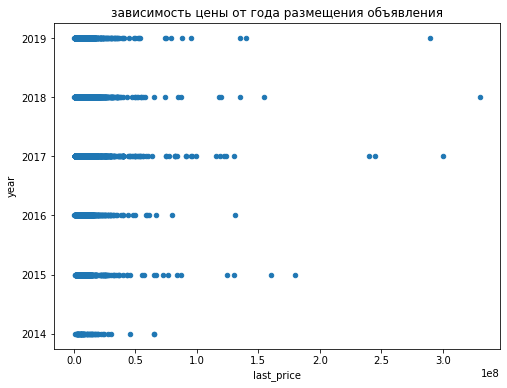

In [159]:
def scatter (df, x, y, name):
    df.plot(x, y, kind='scatter', figsize=(8,6))
    plt.title(name)
    plt.show()
    
scatter (df, x='last_price', y='total_area', name = 'зависимость цены от площади квартиры')
scatter (df, x='last_price', y='rooms', name = 'зависимость цены от количества комнат')
scatter (df, x='last_price', y='apartment_floor', name = 'зависимость цены от этажа')
scatter (df, x='last_price', y='city_centers_nearest', name = 'зависимость цены от удалённости от центра')
scatter (df, x='last_price', y='date', name = 'зависимость цены от дня размещения объявления')
scatter (df, x='last_price', y='month', name = 'зависимость цены от месяца размещения объявления')
scatter (df, x='last_price', y='year', name = 'зависимость цены от года размещения объявления')

<html>
    <body>
        По графикам делаем выводы.<br>
        Рост цены начинается после значения 100 по оси у. Хотя и увеличивается цена не пропорционально площади.<br>
        С увеличением количества комнат и растёт цена. Достаточно пропорционально<br>
        С удалением от центра цена не растет, виден явный пик около нуля.<br>
        Среди дней в месяце распределение цены равномерно, что говорит об отсутствии влияния. Более равномерная зависимость у месяца года и цены, но в декабре виден небольшой рост цены. С 2017 года наблюдается рост цены, далее заметен небольшой спад в цене.<br>
        За первый этаж цена ниже, чем за последний. Самая большая цена за другой этаж. Что вполне реалистично. При покупке жилья предпочтение отдают ни первому, ни последнему этажу.
    </body>
    </html>

Выберим 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [160]:
df_pivot = df.pivot_table(values='metr_price',
                         index='locality_name',
                         aggfunc=['count', 'mean', 'max', 'min'],
                         margins=True).sort_values(('count', 'metr_price'), ascending=False).head(11).round({('mean', 'metr_price'):2})

df_pivot

,count,mean,max,min
,metr_price,metr_price,metr_price,metr_price
locality_name,,,,
All,13704,101413.86,1736842,111
Санкт-Петербург,9576,115031.54,1736842,111
Всеволожск,255,67506.92,136423,31400
Пушкин,222,103779.44,256521,59836
посёлок Шушары,207,79442.93,134000,47700
Колпино,197,75891.12,125000,53333
посёлок Мурино,190,87628.94,138580,53133
Петергоф,142,85227.69,225971,57692


Как видим из получившейся таблицы конечно больше всего объявлений приходится на Санкт-Петребург, а из топ-10 Сестрорецк занимает последнее место по количеству объявлений. Также, по минимальным и максимальным значениям Санкт-Петербург занимает первое место.

Изучим предложения квартир. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [161]:
pd.set_option('mode.chained_assignment', None)

df_spb = df.query("locality_name == 'Санкт-Петербург'") #сформируем новый датафрейм только с Санкт-Петербургом
df_spb['city_centers_km'] = df_spb['city_centers_nearest'] / 1000 #создадим столбец со значениями в километрах
df_spb['city_centers_km'] = (df_spb['city_centers_km']).astype('int') #переведём в целочисленнй формат
df_spb['last_price'] = df_spb['last_price'] / 1000000 #для удобства дальнейшей работы переведём цену в млн.руб.
df_spb['km_price'] = (df_spb['last_price'] / df_spb['city_centers_km']).round(1) #округлим до однного знака, после запятой
df_spb['km_price'].head() #выведем первые пять строк на экран

0     0.8
4     1.2
9     0.4
10    0.4
16    0.7
Name: km_price, dtype: float64

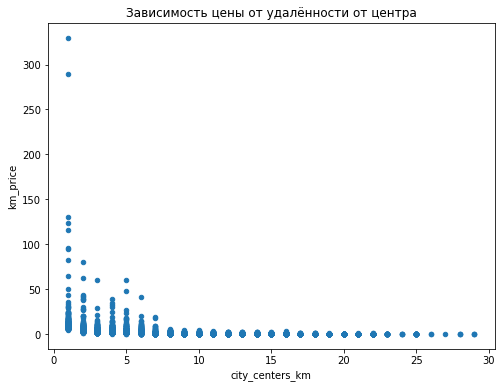

In [162]:
df_spb.plot(x='city_centers_km', y='km_price', kind='scatter', figsize=(8, 6))
plt.title("Зависимость цены от удалённости от центра") 
plt.show()

Видим отдельные выбросы по значения оси y выше 250. Следует посмотреть на график более детально, ограничив значения по оси.

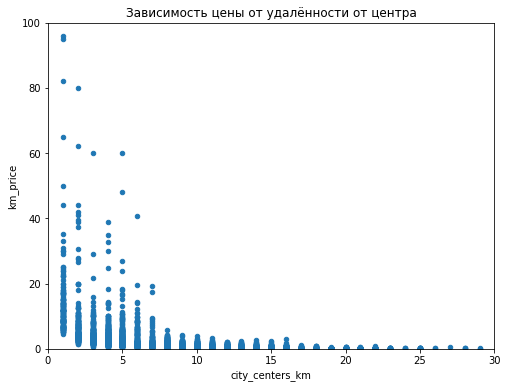

In [163]:
df_spb.plot(x='city_centers_km', y='km_price', kind='scatter', figsize=(8, 6))
plt.xlim(0, 30)
plt.ylim(0, 100)
plt.title("Зависимость цены от удалённости от центра") 
plt.show()

Здесь явно видно, что с 3 до 7 км цены за километр растут равномерно, этот квадрат можно сказать является более насыщенным. Значит это можно назвать центром города. Что касается роста цены за километр, то начиная уже с 6 км видно пиковое повышение цены.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?

In [164]:
df_spb_с = df_spb.loc[(df_spb['city_centers_km'] > 3) & (df_spb['city_centers_km'] < 10)] #создадим новый датафрейм по центру Санкт-Петербурга
df_spb_с.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,locality_name,...,days_exposition,metr_price,date,month,year,apartment_floor,liv_tot_per,kit_tot_per,city_centers_km,km_price
4,10.000,100.0,2018-06-19,2,3.03,14,32.0,13,41.0,Санкт-Петербург,...,121,100000,19,6,2018,0,32%,41%,8,1.2
51,45.000,161.0,2017-10-17,3,3.20,8,38.0,4,50.0,Санкт-Петербург,...,541,279503,17,10,2017,0,24%,31%,6,7.5
52,11.795,136.0,2017-09-22,6,3.00,2,94.0,2,11.0,Санкт-Петербург,...,0,86727,22,9,2017,2,69%,8%,6,2.0
56,4.350,41.0,2016-03-28,1,2.80,7,18.1,4,11.1,Санкт-Петербург,...,152,106097,28,3,2016,0,44%,27%,9,0.5
63,20.000,118.0,2018-09-11,3,3.00,9,68.0,7,16.0,Санкт-Петербург,...,37,169491,11,9,2018,0,58%,14%,4,5.0


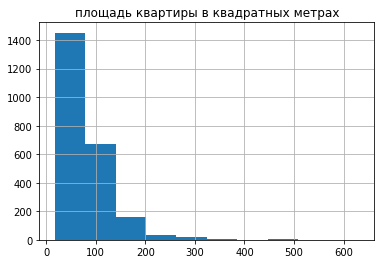

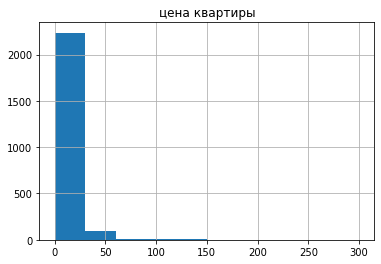

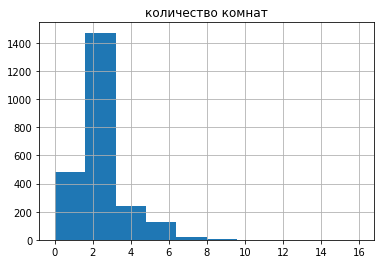

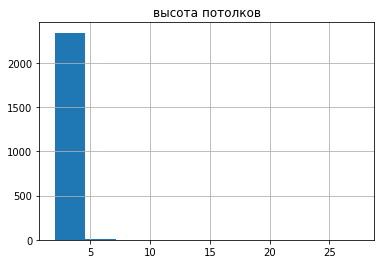

In [165]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
name = ['площадь квартиры в квадратных метрах', 'цена квартиры', 'количество комнат', 'высота потолков']

for i in range(len(columns)):
    df_spb_с[columns[i]].hist()
    plt.title(name[i])
    plt.show()

<html>
    <body>По таким данным можно сделать следующие выводы:<br>
        квартир с большой площадью не так много из общей массы, меньше 100 квадратных метров квартир больше всего;<br>
        также и распределяется цена, достаточно высокая на квартиры с большей площадью;<br>
        больше всего квартир с двумя и тремя комнатами и с высотой потолков окло 3 метров.
    </body>
    </html>

Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

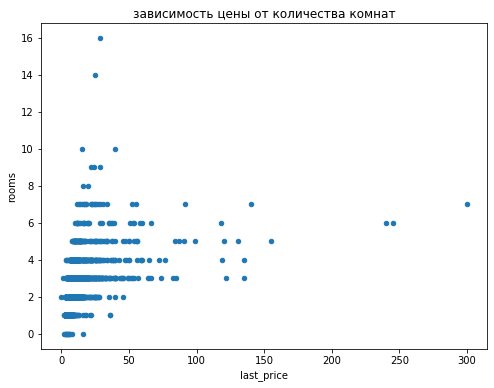

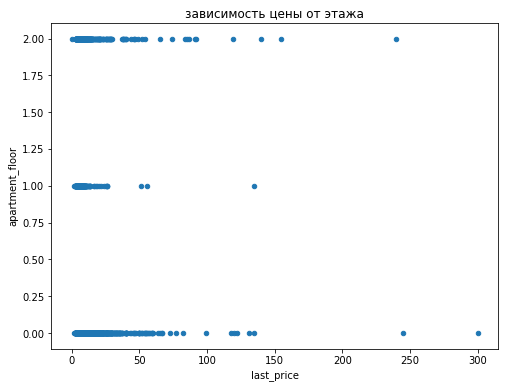

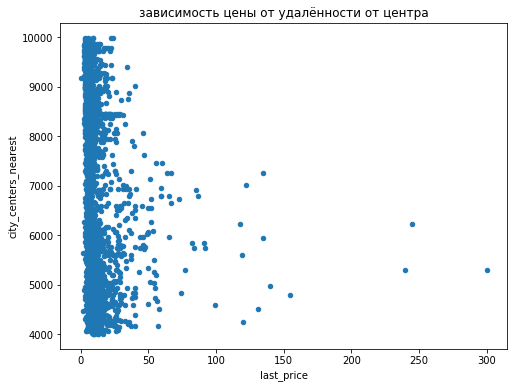

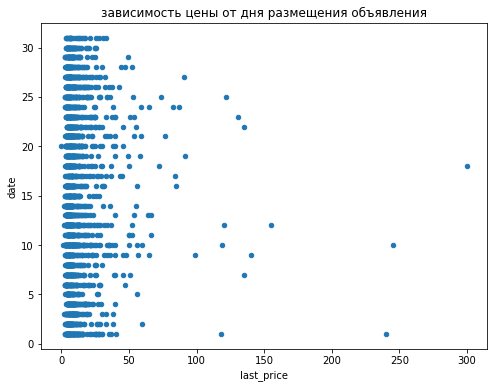

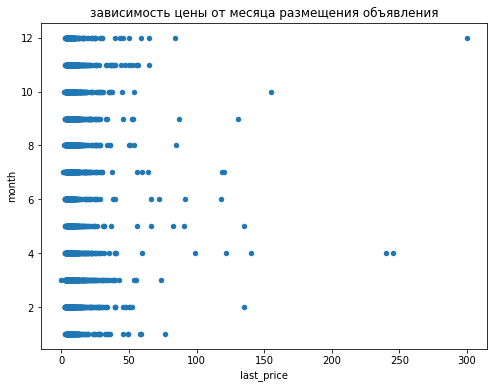

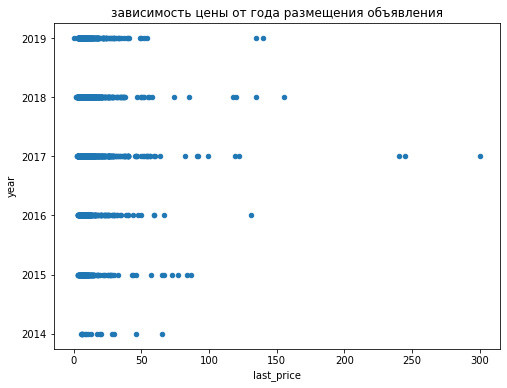

In [166]:
def scatter (df_spb_с, x, y, name):
    df_spb_с.plot(x, y, kind='scatter', figsize=(8,6))
    plt.title(name)
    plt.show()
    
scatter (df_spb_с, x='last_price', y='rooms', name = 'зависимость цены от количества комнат')
scatter (df_spb_с, x='last_price', y='apartment_floor', name = 'зависимость цены от этажа')
scatter (df_spb_с, x='last_price', y='city_centers_nearest', name = 'зависимость цены от удалённости от центра')
scatter (df_spb_с, x='last_price', y='date', name = 'зависимость цены от дня размещения объявления')
scatter (df_spb_с, x='last_price', y='month', name = 'зависимость цены от месяца размещения объявления')
scatter (df_spb_с, x='last_price', y='year', name = 'зависимость цены от года размещения объявления')

По зависимости цены и количества комнат, цена за квартиры с 3 и 4 комнатами растёт. Хотя и есть снижение цены за 6,7,8-комнатные квартиры. Самая низкая цена у первого этажа, другие этажи и последний растут в цене в равной степени. По зависимости цены от удалённости от центра - тут виден резкий пик в цене в самом центре. Цена особо не зависит от дня в месяце. Также цена и по месяцам распределяется, более мене равномерно. А с 2017 года было увеличение в цене.

Посмотрим на матрицу корреляции по центральной выборке

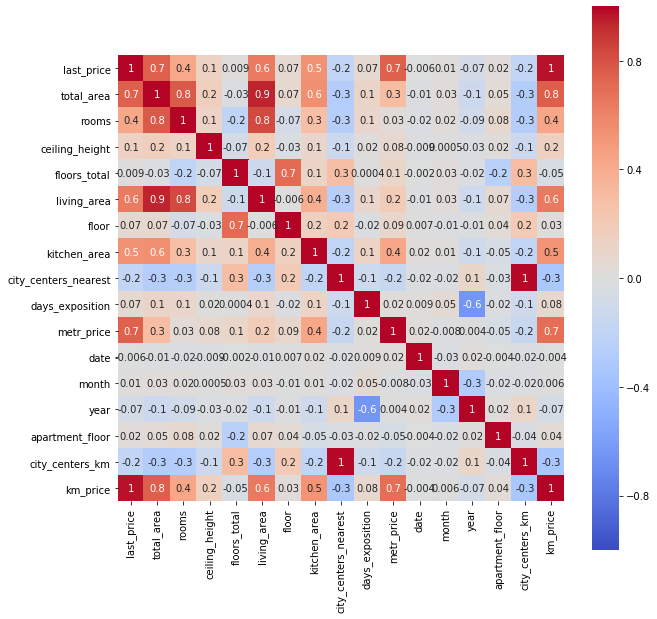

In [167]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_spb_с.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', square=True, ax = ax)

На матрице корреляции появилась зависимость величиной в единицу, это зависимсоть цены от цены за километр. Такая зависимость предсказуема, поскольку и расчёт значений столбца цена за километр, состоял из отношения цены к удалённости от центра. Также и зависимость в единицу между столбцами удалённость от центра города в метрах и удалённость от центра города в км. Также в нижней части матрицы появились небольшие отрицательные значения, что не показывает новых зависимостей.

## Общий вывод

<html>
    <body>
        <p>Больше всего объявлений приходится на Санкт-Петребург, а из топ-10 городов Сестрорецк занимает последнее место по количеству объявлений.</p>
        <p>Если сравнивать общую картину по объявлениям с центром Санкт-Петербурга, то много общего:<br>
с 2017 года было увеличение в цене,<br>
цена по месяцам распределяется, более мене равномерно,<br>
цена особо не зависит от дня в месяце,<br>
самая низкая цена у первого этажа, другие этажи и последний растут в цене в равной степени,<br>
в центре Санкт-Петербурга По зависимости цены и количества комнат, цена за квартиры с 3 и 4 комнатами растёт,<br>
больше всего квартир в Санкт-Петербурге с высотой потолков окло 3 метров,<br>
больше всего квартир в Санкт-Петербурге с двумя и тремя комнатами.</p>
        <p>Среди факторов больше всего влияющих на стоимость квартиры:<br> 
удалённость отцентра,<br>
площадь квартиры и количество комнат,<br>
            этаж квартиры.</p>
    </body>
    </html>